In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import sys
import tkinter as tk
from tkinter import filedialog
sys.path.append("../")

from utils.preprocessing import *

In [4]:
pose_csv = 'K:/KayCei/Naturalistic Closed Loop/AD12-D1/Videos/021624-RT BILATERAL/VideoOutputCamera 0-16022024-183325DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(119917, 12)


In [5]:
save_path = os.path.dirname(pose_csv)  # Get the directory of pose_csv
%store save_path
print(save_path)

Stored 'save_path' (str)
K:/KayCei/Naturalistic Closed Loop/AD12-D1/Videos/021624-RT BILATERAL


### original data table

In [6]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               483.344818  154.942719   
3                                               488.743439  154.377640   
6                                               495.667053  150.574860   
9                                               497.313568  153.689850   
12                                              487.547577  163.915726   
15                                              474.990753  172.009506   
18                                              477.696686  172.350891   
21                                              498.815521  188.877808   
24                                              515.576477  211.680878   
27                                              519.917969  226.223358   
30                                              520.859070  236.882812   
33                                              502.201050  252.082901   
36                                              487.681000  255.604187   
39                                              461.059265  265.375336   
42                                              446.228333  273.738647   
45                                              442.919281  298.045593   
48                                              444.239380  321.994812   
51                                              443.366241  346.784302   
54                                              441.633820  375.497650   
57                                              448.794281  405.178284   
60                                              452.964203  431.972565   
63                                              451.736908  460.556641   
66                                              452.703522  484.497070   
69                                              450.176056  505.860565   
72                                              450.219757  531.013550   
75                                              449.272217  556.385742   
78                                              449.671234  580.441406   
81                                              454.346100  589.127441   
84                                              460.320312  585.293518   
87                                              468.174316  582.039124   
90                                              479.585480  578.896423   
93                                              481.895203  578.314331   
96                                              476.417328  576.806824   
99                                              470.453430  574.335327   
102                                             465.500916  575.789246   
105                                             450.893585  567.258179   
108                                             424.611908  559.359680   
111                                             341.959961  552.853394   
114                                             323.055634  563.018066   
117                                             315.499634  568.989502   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           0.999999    444.934723  168.282486   0.999665   439.686829   
3           0.999999    448.444672  164.042755   0.999997   483.103790   
6           0.999999    453.347321  162.922089   0.999994   492.017273   
9           1.000000    457.911774  160.135269   0.999988   490.391602   
12          1.000000    453.315308  162.352371   0.999997   471.601898   
15          0.999994    441.858978  167.765961   0.999929   454.367706   
18          0.999998    442.476105  169.565399   0.999878   451.102417   
21          1.000000    463.009491  175.619034   0.999869   450.368713   
24 

### after removing likelihood and headers

In [7]:
pose[:5, :]

array([[483.34481812, 154.94271851, 444.9347229 , 168.28248596,
        439.68682861, 186.8946228 , 380.48709106, 196.05937195,
        420.93569946, 224.13409424, 379.71533203, 243.98379517],
       [487.57568359, 155.85861206, 443.72964478, 173.7915802 ,
        440.89266968, 185.79922485, 380.26544189, 196.36985779,
        420.65933228, 223.83135986, 379.6361084 , 242.39291382],
       [487.9447937 , 156.05110168, 443.84216309, 173.69573975,
        440.66400146, 185.96611023, 380.2711792 , 196.40362549,
        420.69680786, 223.8260498 , 379.66018677, 242.34957886],
       [488.74343872, 154.37763977, 448.44467163, 164.04275513,
        483.10379028, 734.77459717, 379.58041382, 196.53347778,
        420.24658203, 223.27622986, 379.23895264, 239.30284119],
       [489.47485352, 153.86965942, 451.74343872, 161.55819702,
        465.85189819, 165.93664551, 380.0463562 , 195.95825195,
        420.71389771, 223.5422821 , 381.26837158, 237.67289734]])

### plot

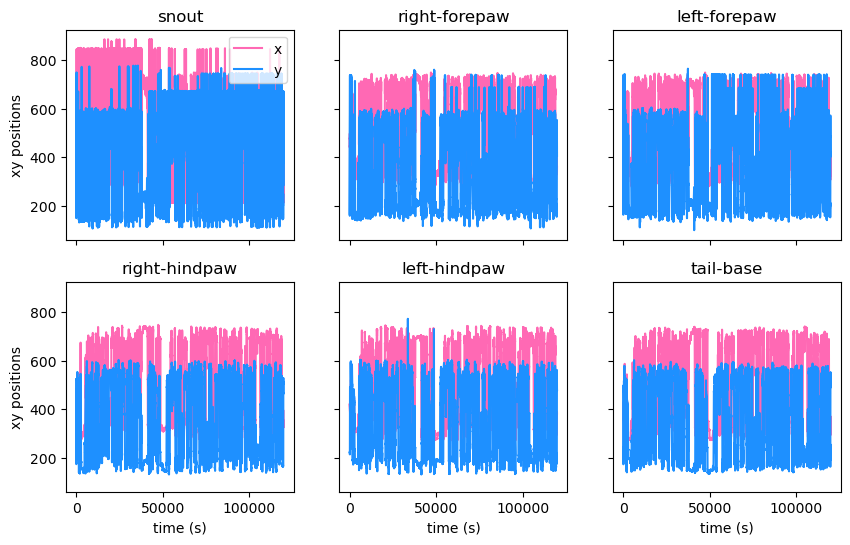

In [8]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [9]:
np.save('../processed_data/pose_video_exp_16.npy', pose)